In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

In [4]:
original_img = plt.imread('bird_small.png')


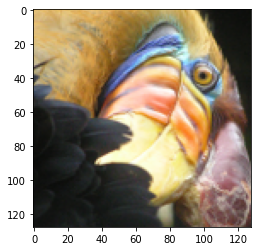

In [5]:
plt.imshow(original_img)

<a name="4"></a>
## 4 - Image compression with K-means

In this exercise, you will apply K-means to image compression. 

* In a straightforward 24-bit color representation of an image$^{2}$, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
* Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of
colors to 16 colors.
* By making this reduction, it is possible to represent (compress) the photo in an efficient way. 
* Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

In this part, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image.
* Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space.
* Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.


In [34]:
# Divide by 255 so that all values are in the range 0 - 1 (not needed for PNG files)
# original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

In [7]:
X_img = np.reshape(original_img, (original_img.shape[0]*original_img.shape[1],3))


In [22]:
print(original_img[0][0][2])

0.40392157


In [6]:
print("Shape of original_ing is:", original_img.shape)


Shape of original_ing is: (128, 128, 3)


In [24]:
print(X_img.shape)

(16384, 3)


In [29]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    ### START CODE HERE ###
    for i in range(len(idx)):
        distance = []
        for j in range(K):
            norm_ij = np.linalg.norm(X[i]-centroids[j])
            distance.append(norm_ij)
            
        idx[i] = np.argmin(distance)
        # Returns the index where the 
            
        
     ### END CODE HERE ###
    
    return idx

In [28]:
def compute_centroids_mean(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    
    ### START CODE HERE ###
    for k in range(K):
        points = X[idx==k]
        centroids[k] = np.mean(points,axis=0)
        
    ### END CODE HERE ## 
    
    return centroids

In [25]:
def kMeans_init_centroids(X, K):
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

In [31]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids_mean(X, idx, K)
    plt.show() 
    return centroids, idx

# K-Means on image pixels 

In [32]:
k = 16
max_iters = 10
initial_centroids = kMeans_init_centroids(X_img,k)
centroids,idx = run_kMeans(X_img,initial_centroids,max_iters)


K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 576x432 with 0 Axes>

In [35]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [9 9 9 9 9]


AttributeError: 'Axes3D' object has no attribute 'w_yaxis'

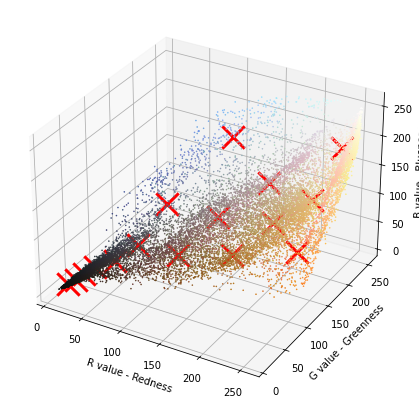

In [37]:
plot_kMeans_RGB(X_img, centroids, idx, k)

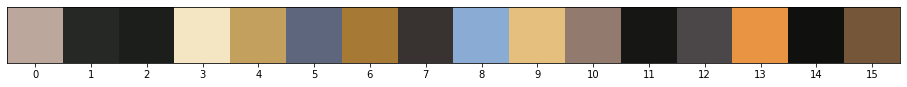

In [38]:
show_centroid_colors(centroids)

In [39]:
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

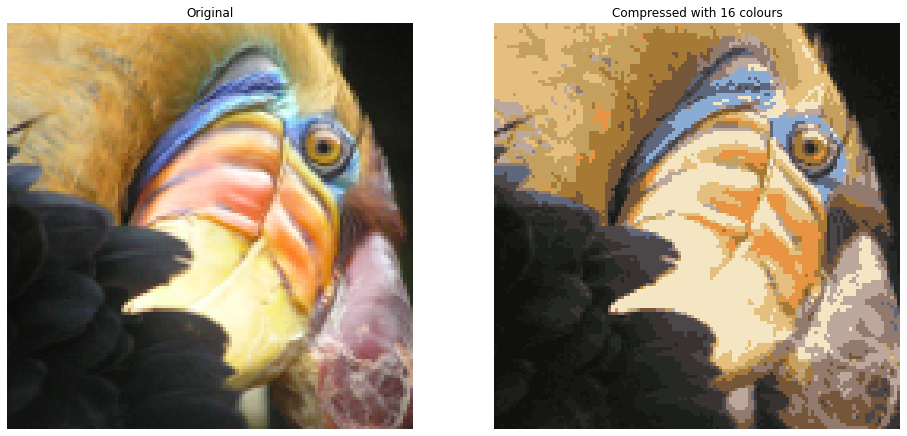

In [41]:
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%k)
ax[1].set_axis_off()